In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submit = pd.read_csv("sample_submission.csv")

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("Train Shape: ",train_df.shape)
print("Test shape: ",test_df.shape)

Train Shape:  (1460, 81)
Test shape:  (1459, 80)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#missing vlaues in train data
missing_train = train_df.isnull().sum().sort_values(ascending =False)
missing_train[missing_train>0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [7]:
#missing values in test data
missing_test = test_df.isnull().sum().sort_values(ascending =False)
missing_test[missing_test>0]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
dtype: int64

In [8]:
print("\n Saleprice Summary")
train_df['SalePrice'].describe()


 Saleprice Summary


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
import matplotlib.pyplot as plt

In [10]:
sns.set(style="whitegrid")

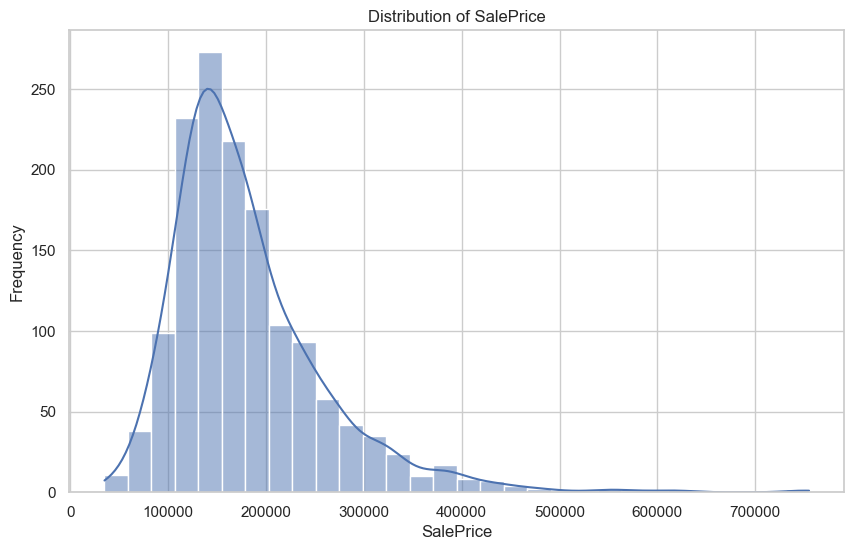

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(train_df["SalePrice"],kde=True,bins=30)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

In [12]:
corr = train_df.corr(numeric_only =True)
top_corr = corr["SalePrice"].sort_values(ascending=False).head(11)

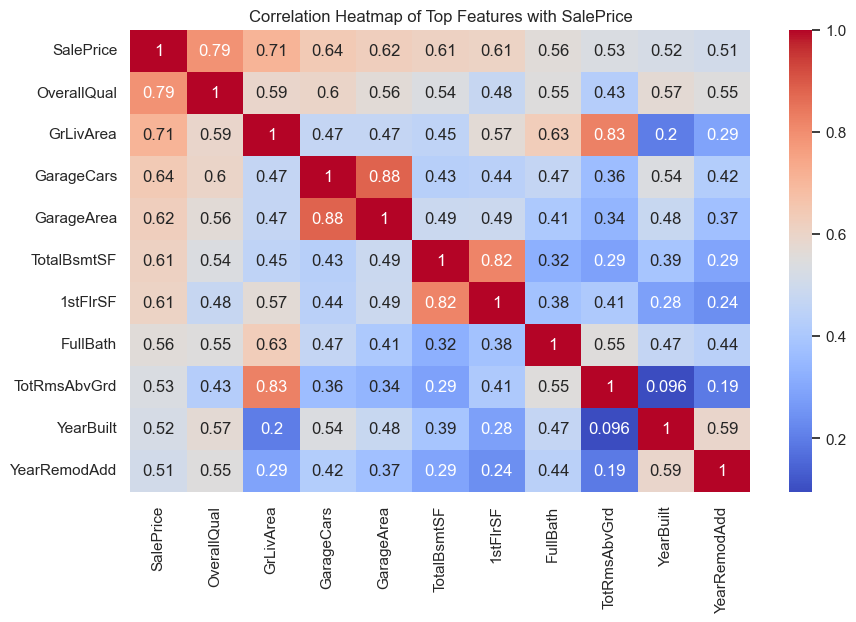

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df[top_corr.index].corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap of Top Features with SalePrice")
plt.show()

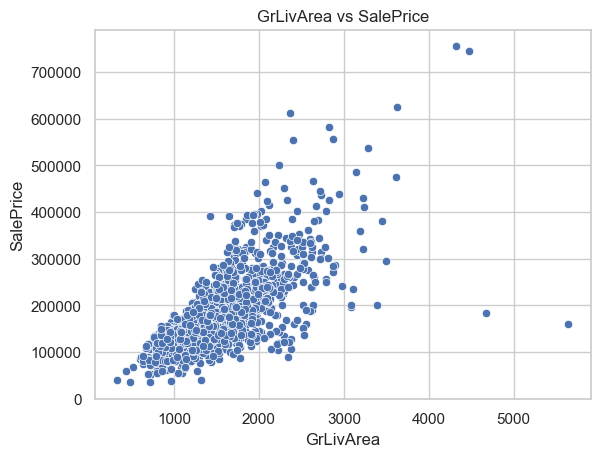

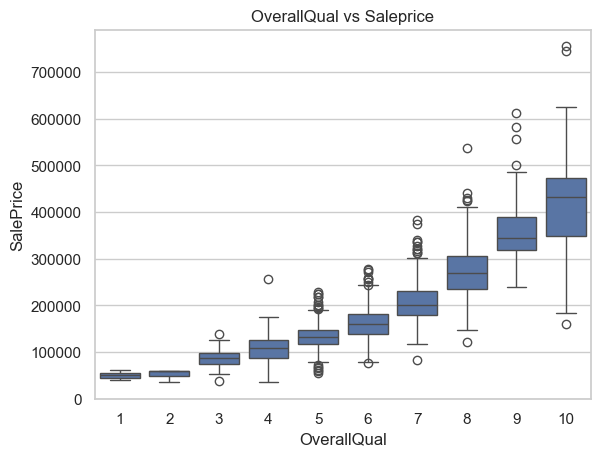

In [14]:
plt.figure(figure=(10,6))
sns.scatterplot(x="GrLivArea" , y='SalePrice',data=train_df)
plt.title('GrLivArea vs SalePrice')
plt.show()

plt.figure(figure=(10,6))
sns.boxplot(x="OverallQual",y="SalePrice",data=train_df)
plt.title('OverallQual vs Saleprice')
plt.show()

In [15]:
missing_train = train_df.isnull().mean().sort_values(ascending = False)*100
missing_train

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [16]:
missing_test = train_df.isnull().mean().sort_values(ascending = False)*100
missing_test

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [17]:
train_target = train_df["SalePrice"]
train_df_ = train_df.drop(['SalePrice'],axis =1)
combined = pd.concat([train_df_,test_df],axis = 0,ignore_index =True)
combined.shape

(2919, 80)

In [18]:
missing_percent = combined.isnull().mean()*100
high_missing = missing_percent[missing_percent > 80].index.tolist()
high_missing

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [19]:
combined = combined.drop(columns=high_missing)

In [20]:
numerical_cols = combined.select_dtypes(include = ['number']).columns
categorical_cols = combined.select_dtypes(include = ['object']).columns


In [21]:
for col in numerical_cols :
    combined[col] = combined[col].fillna(combined[col].median())

In [22]:
for col in categorical_cols :
    combined[col] = combined[col].fillna('None')

In [23]:
print("Any missing values ?" ,combined.isnull().sum().sum())

Any missing values ? 0


In [24]:
train_processed = combined.iloc[:train_df.shape[0],:]
test_processed = combined.iloc[train_df.shape[0]:,:]

In [25]:
print("Train processed shape: ",train_processed.shape)
print("Test processed shape: ",test_processed.shape)

Train processed shape:  (1460, 76)
Test processed shape:  (1459, 76)


In [27]:
full_data = pd.concat([train_processed,test_processed],axis =0 ,ignore_index=True)

In [28]:
full_data_encoded = pd.get_dummies(full_data)

In [30]:
X_train = full_data_encoded.iloc[:train_df.shape[0],:]

In [31]:
X_test = full_data_encoded.iloc[train_df.shape[0]:,:]
y_train = train_target

In [33]:
print(X_train.shape)
print(X_test.shape)

(1460, 294)
(1459, 294)


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [38]:
lasso = Lasso(max_iter =1000)
params = {'alpha' : [0.0005,0.001,0.005,0.05,0.1,0.5,1,5,10]}

In [39]:
grid = GridSearchCV(estimator = lasso, param_grid = params , cv=5,scoring='neg_root_mean_squared_error')

In [40]:
grid.fit(X_train,y_train)

C:\Users\arvin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.179e+10, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\arvin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.933e+10, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\arvin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.930e+10, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0005, 0.001, 0.005, 0.05, 0.1, 0.5, 1, 5,
                                   10]},
             scoring='neg_root_mean_squared_error')

In [41]:
print("best score: ",grid.best_score_)
print("Best parameter : ",grid.best_params_)

best score:  -33110.63008380216
Best parameter :  {'alpha': 10}


In [42]:
predict = grid.predict(X_test)

In [44]:
from sklearn.metrics import r2_score

In [47]:
train_pred = grid.predict(X_train)
score = r2_score(y_train , train_pred)
print("Score : " , score)

Score :  0.9313406780516491


In [49]:
submission = pd.DataFrame({
    'Id' :test_df['Id'],'SalePrice':predict})

In [50]:
submission.to_csv('Lasso_submission.csv',index = False)

In [51]:
import zipfile 

In [52]:
with zipfile.ZipFile('Lasso_submission.zip','w') as zipf:
    zipf.write('Lasso_submission.csv')